In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

Data Visualization

In [3]:
x = np.linspace(0,5,11)
y = x ** 2

In [4]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
y 

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

Text(0.5, 1.0, 'Title')

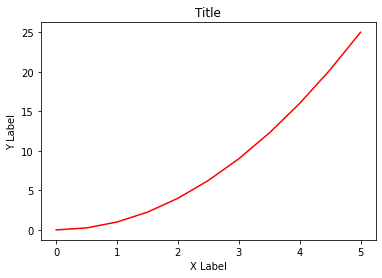

In [8]:
#functional method 
plt.plot(x,y, 'r-')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title')

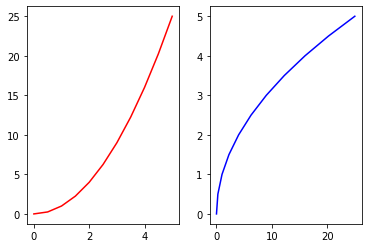

In [10]:
plt.subplot(1,2,1)
plt.plot(x,y,'r')

plt.subplot(1,2,2)
plt.plot(y,x,'b')

Text(0.5, 1.0, 'Set Title')

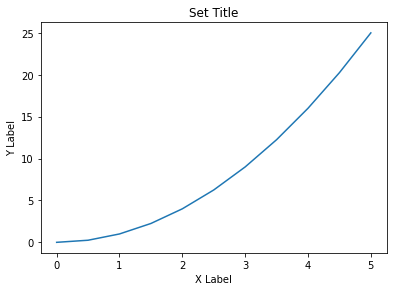

In [14]:
#object oriented methods 
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x,y)
axes.set_xlabel('X Label')
axes.set_ylabel('Y Label')
axes.set_title('Set Title')

Text(0.5, 1.0, 'Larger Plot')

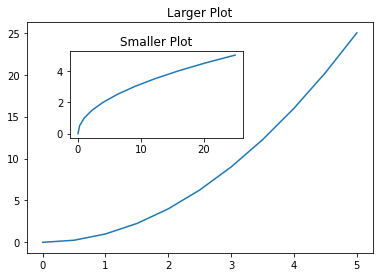

In [20]:
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.2,0.5,0.4,0.3])

axes1.plot(x,y)
axes2.plot(y,x)
axes2.set_title('Smaller Plot')
axes1.set_title('Larger Plot')

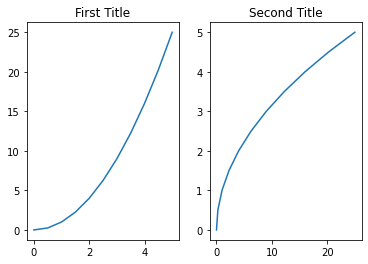

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].set_title('First Title')
axes[1].set_title('Second Title')

axes[0].plot(x,y)
axes[1].plot(y,x)

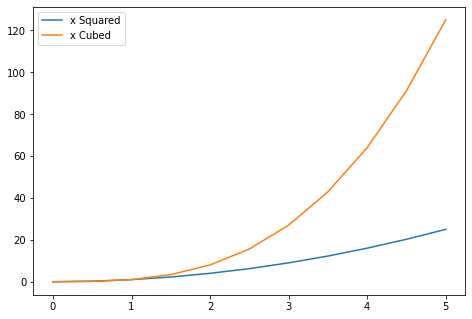

In [37]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.plot(x,x**2, label='x Squared')
ax.plot(x, x**3, label='x Cubed')

#add a legend
ax.legend()

(0.0, 15.0)

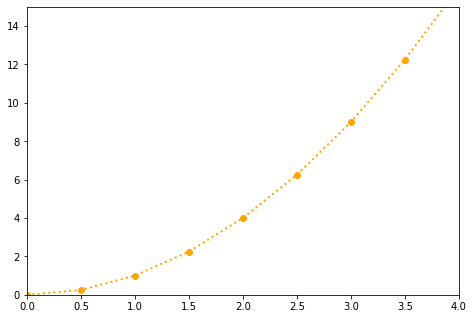

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#You can put in RGB hex codes for the colors
ax.plot(x,y, color='orange', linewidth=2, linestyle=':', marker='o')
ax.set_xlim([0,4])
ax.set_ylim([0,15])

In [52]:
tips = sns.load_dataset('tips')

### Distribution Plots Seaborn

<AxesSubplot:xlabel='total_bill'>

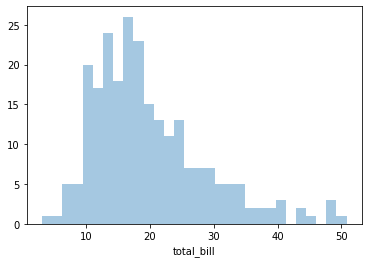

In [55]:
#For better detail pass through bins argument 
sns.distplot(tips['total_bill'], kde=False, bins=30)

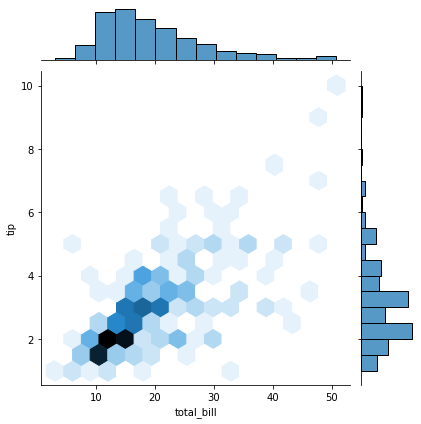

In [58]:
#bivariate data, two variables 
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')
#shows a distribution of where there are the most dots

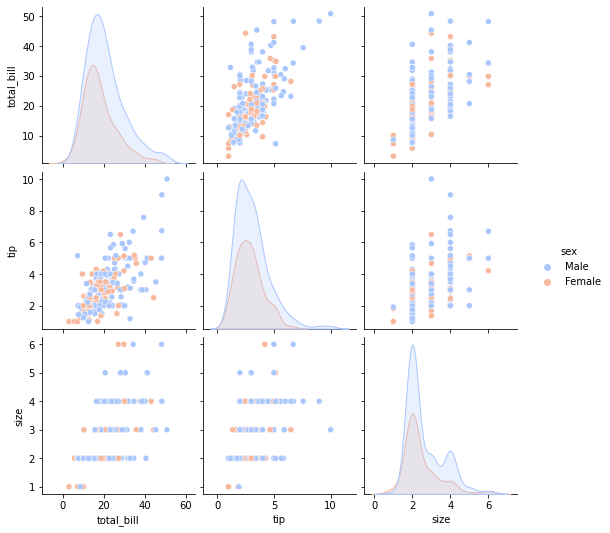

In [61]:
#all numerical columns
sns.pairplot(tips, hue='sex', palette='coolwarm')

### Categorical Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

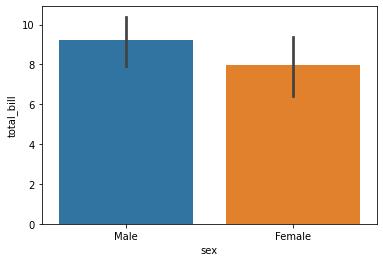

In [64]:
#x is a categorical column, y is a numerical column
sns.barplot(x='sex',y='total_bill', data=tips, estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

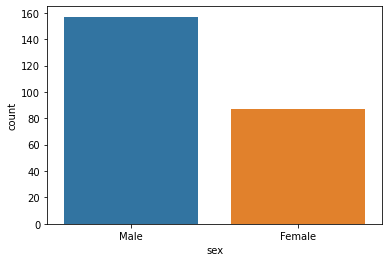

In [65]:
sns.countplot(x='sex', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

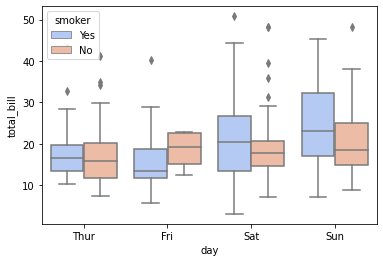

In [68]:
#box and whisker plot 
#smokers spend more on the weekend
sns.boxplot(x='day', y='total_bill', data=tips,hue='smoker', palette='coolwarm')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

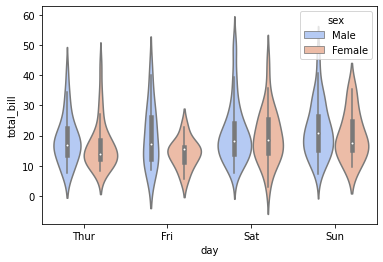

In [71]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', palette='coolwarm')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

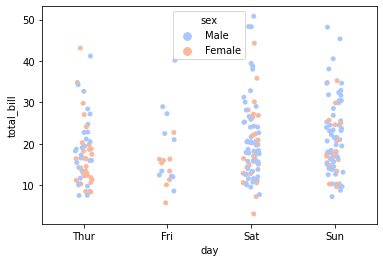

In [77]:
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', palette='coolwarm')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

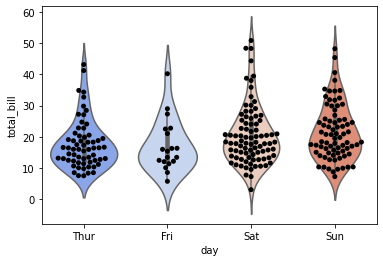

In [80]:
#might not scale for larger datasets 
sns.violinplot(x='day', y='total_bill', data=tips, palette='coolwarm')
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

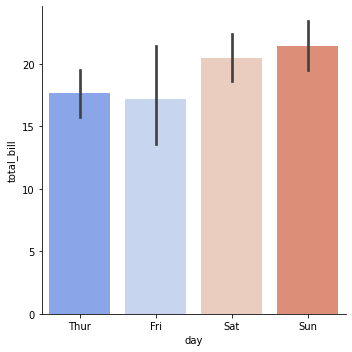

In [82]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar', palette='coolwarm')

### Matrix Plots

In [84]:
flights = sns.load_dataset('flights')

In [85]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [87]:
#matrix form of data, important the column and index name match up
#required for heatmap
tc = tips.corr()

<AxesSubplot:>

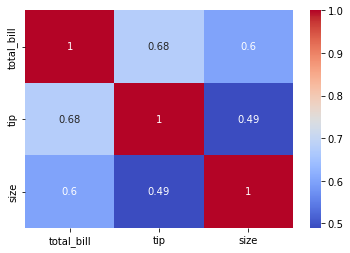

In [90]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [91]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [94]:
#must get flights into matrix form 
fp = flights.pivot_table(index='month', columns='year', values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

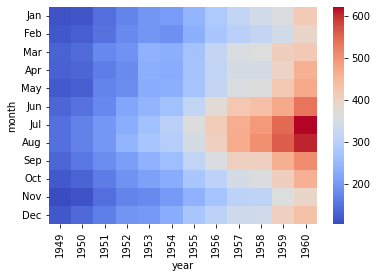

In [99]:
sns.heatmap(fp, cmap='coolwarm')

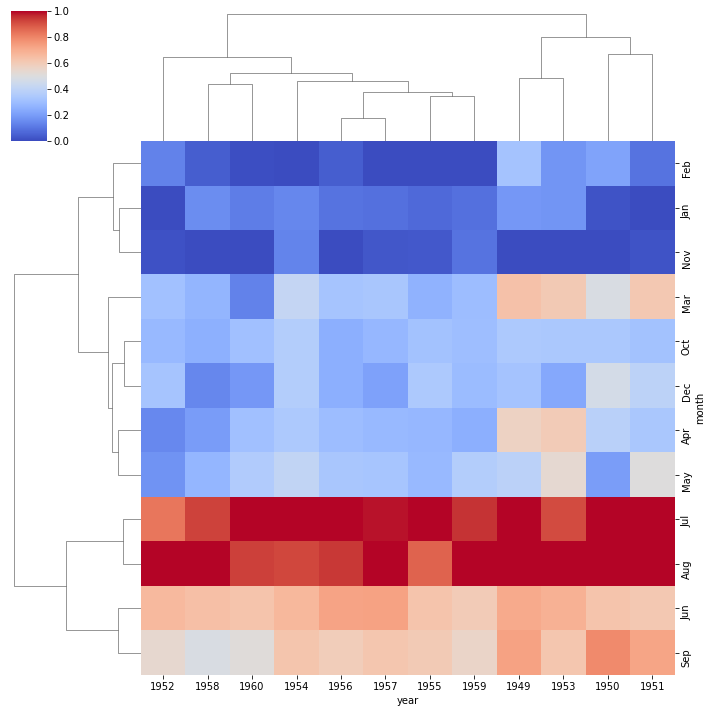

In [102]:
#clusters columns and rows that are very similar to each other 
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)

### Grids

In [103]:
iris = sns.load_dataset('iris')

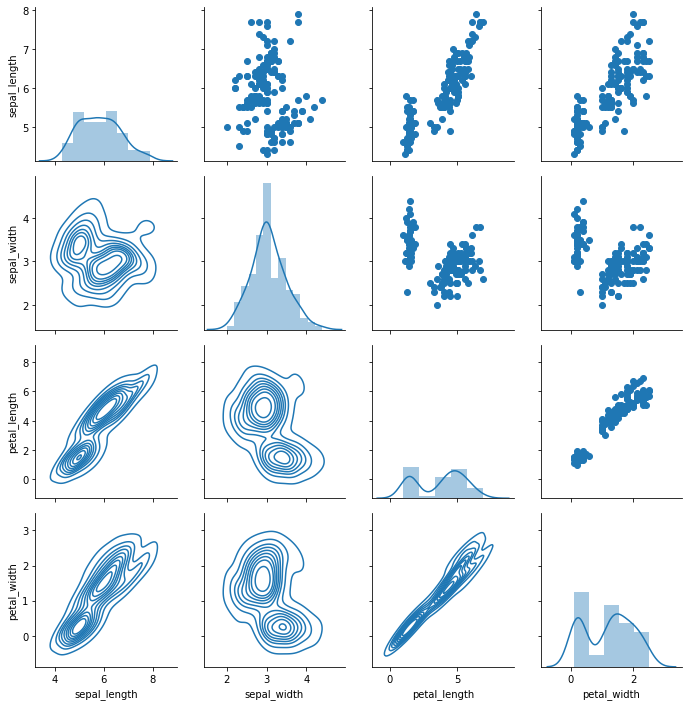

In [107]:
#similar to pairplot but better customization
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [108]:
tips = sns.load_dataset('tips')

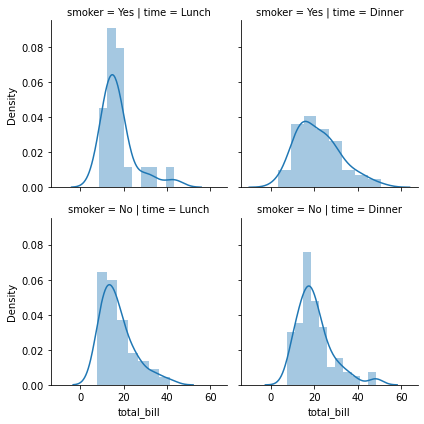

In [110]:
#mapping numeric four different ways 
#yes/no categorical columns
r = sns.FacetGrid(data=tips, col='time', row='smoker')
r.map(sns.distplot,'total_bill')

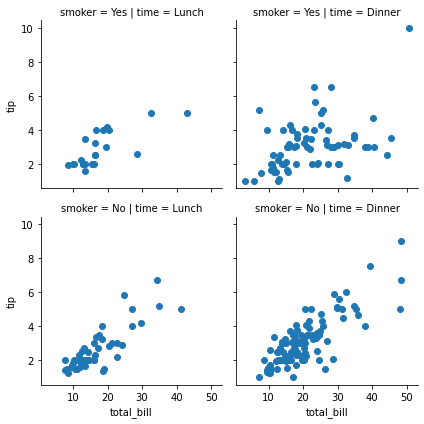

In [113]:
a = sns.FacetGrid(data=tips, col='time', row='smoker')
a.map(plt.scatter,'total_bill', 'tip')

### Regression Plots

In [117]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


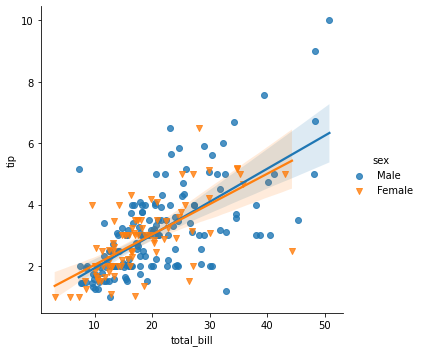

In [122]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'])

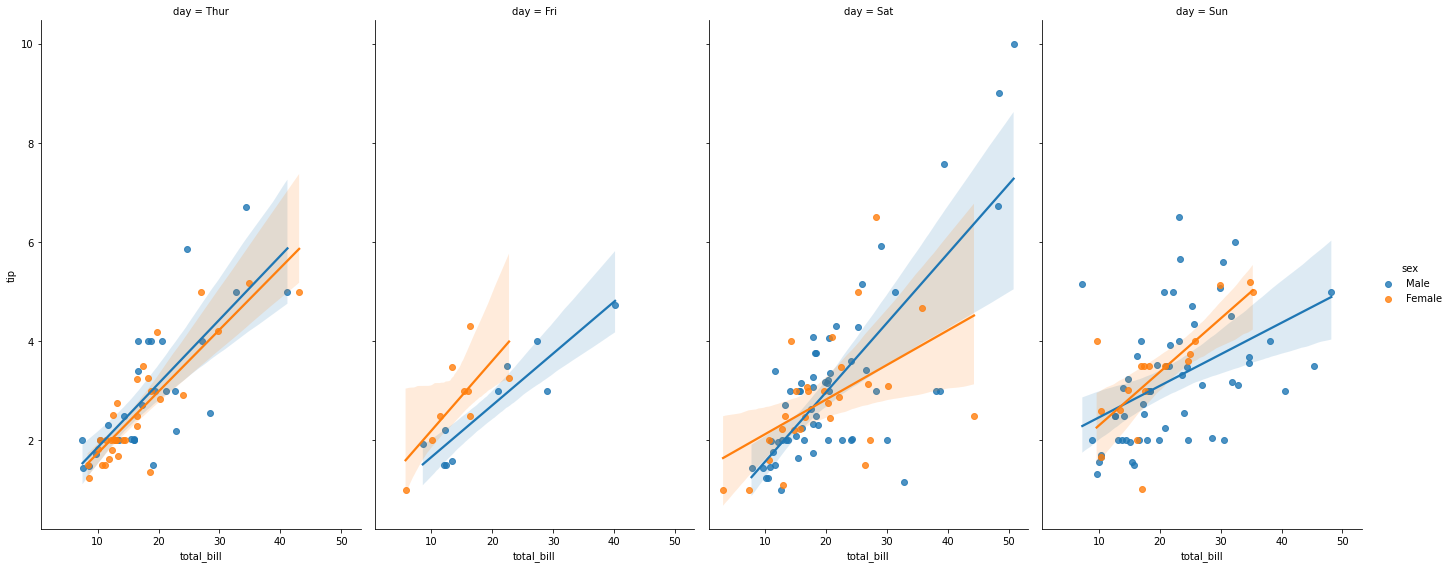

In [126]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', aspect=0.6,size=8)

### Style 

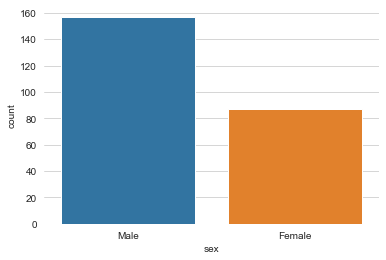

In [130]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)
sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

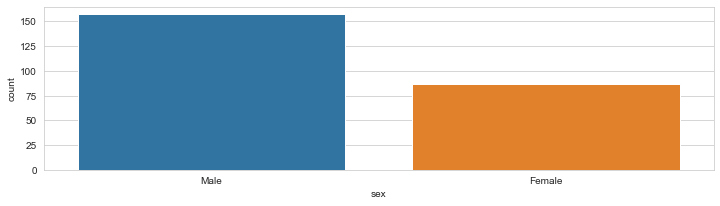

In [132]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex', data=tips)

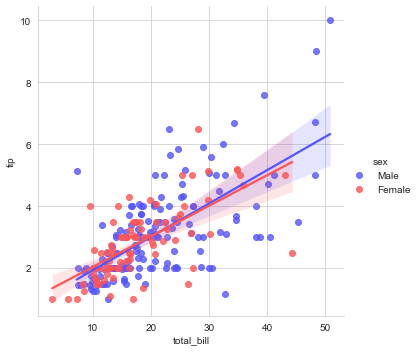

In [134]:
#for color maps google matplotlib colormaps
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='seismic')